In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
import sys
sys.path.append('../')
from src import(
    UNet,
    LandmarkDataset,
    get_valid_transforms,
    load_model_weights,
)

In [2]:
args = dict()
args['base_folder'] = '../data/val'
args['weight_fn'] = '../checkpoint/colab/model_best.pth'
args['num_classes'] = 10

os.path.isdir(args['base_folder'])
os.path.isfile(args['weight_fn'])

True

In [3]:
model = UNet()
model.load_state_dict(torch.load(args['weight_fn'], map_location=torch.device('cpu')))
model.eval();

In [4]:
dataset = LandmarkDataset(
    base_folder=args['base_folder'],
    transforms=get_valid_transforms(),
)

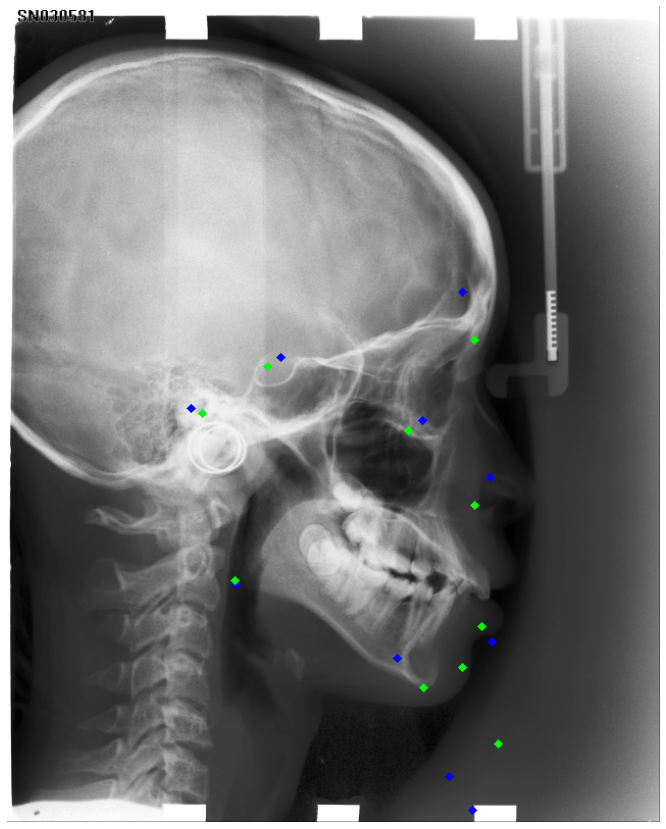

CPU times: user 21.1 s, sys: 1.22 s, total: 22.3 s
Wall time: 21.7 s


In [13]:
%%time
sample = random.choice(dataset)

image, target = sample['input'], sample['target']
pred = model(image.unsqueeze(0))

image = image.squeeze().detach().numpy()
true = target.squeeze().detach().numpy()
pred = pred.squeeze().detach().numpy()
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

for idx in range(args['num_classes']):
    pred_coord = np.array(np.where(pred[idx] > pred[idx].max() * .95))
    pred_coord = pred_coord.mean(axis=1)

    true_coord = np.array(np.where(true[idx] > true[idx].max() * .95))
    true_coord = true_coord.mean(axis=1)

    cv2.circle(
        img=image,
        center=(int(pred_coord[1]), int(pred_coord[0])),
        radius=2,
        color=(0, 0, 1), ## Pred
        thickness=3
    )

    cv2.circle(
        img=image,
        center=(int(true_coord[1]), int(true_coord[0])),
        radius=2,
        color=(0, 1, 0), ## True
        thickness=3
    )
    
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(image)
plt.show()